# Using GokuEmu: A Matter Power Spectrum Emulator

This notebook demonstrates how to use **GokuEmu**, a Gaussian Process-based emulator for predicting the nonlinear **matter power spectrum**. 

## 1 Import modules

In [1]:
import sys
sys.path.append("../")
from emulator.gokuemu import MatterPowerEmulator
import numpy as np
import matplotlib.pyplot as plt

## 2 Load the GP Model

GokuEmu provides three models:
- **GokuEmu**: Standard emulator trained on the whole Goku suite
- **GokuEmu-W**: Wide-range cosmology emulator trained on Goku-W
- **GokuEmu-N**: Narrow-range cosmology emulator trained on Goku-N

**Memory Consideration:**  
Loading the full GokuEmu requires **~36GB of RAM**. Optionally, to optimize memory usage, specify the redshifts you need (select from [0, 0.2, 0.5, 1, 2, 3]).

In [2]:
emu = MatterPowerEmulator(redshifts=[0.])  # model = "GokuEmu" by default

 /Users/astroyyh/miniconda3/envs/goku-env/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/astroyyh/miniconda3/envs/goku-env/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/astroyyh/miniconda3/envs/goku-env/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Users/astroyyh/miniconda3/envs/goku-env/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


## 3 Generate the matter power spectrum

There are two ways to making predictions:

### 3.1 Predicting P(k) for a Single Cosmology

This method computes the **matter power spectrum** for a **single** cosmological model.

In [3]:
# input
z = 0. # redshift

k, Pk, _ = emu.predict(Om=0.264, Ob=0.047, hubble=0.73, As=1.8e-9, ns=0.99, w0=-1.11, wa=0.27999999999999997, mnu=0.0825, Neff=3.55, alphas=-0.01685, redshift=z)

### 3.3 Predicting P(k) for Multiple Cosmologies

This method allows predicting **multiple** cosmological models at once, without increasing computation time.

In [4]:
# Omega_m Omega_b hubble scalar_amp ns w0 wa mnu Neff alphas
cosmo_params = np.array([0.264, 0.047, 0.73, 1.8e-09, 0.99, -1.11, 0.27999999999999997, 0.0825, 3.55, -0.01685])
cosmo_params1 = np.array([0.264, 0.047, 0.7, 1.8e-09, 0.99, -1.11, 0.27999999999999997, 0.0825, 3.55, -0.01685])
cosmo_params2 = np.array([0.264, 0.047, 0.7, 1.8e-09, 0.99, -1.11, 0.27999999999999997, 0.0825, 3.55, -0.0])

cosmo_set = np.array([cosmo_params, cosmo_params1,cosmo_params2])
k, Pk_set, _ = emu.predict(cosmo_set, redshift=z)

## Visualizing the Matter Power Spectrum

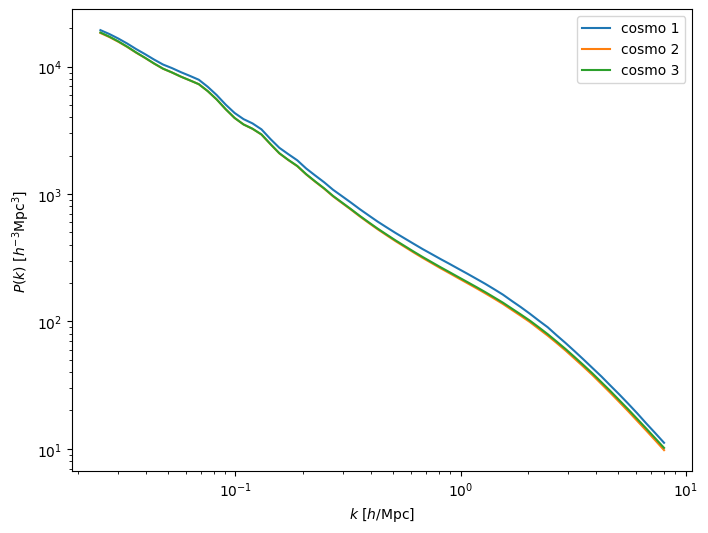

In [5]:
# plot
plt.figure(figsize=(8, 6))
plt.plot(k, Pk_set[0], label="cosmo 1")
plt.plot(k, Pk_set[1], label="cosmo 2")
plt.plot(k, Pk_set[2], label="cosmo 3")
# plt.plot(k, Pk_true_interp, label="true")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$k$ [$h$/Mpc]")
plt.ylabel(r"$P(k)$ [$h^{-3}$Mpc$^3$]")
plt.legend()
plt.show()